In [36]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
import re
import copy
import pandas as pd
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

kiwi = Kiwi(typos='basic')
stopwords = Stopwords()

In [60]:
query = "전체"
df = pd.read_csv(f"../Preprocessed_Content/전체/{query}_combined.csv") # 전체
#df = pd.read_csv(f"../Preprocessed_Content/천주교/preprocessed_{query}.csv") # 개별
df

,link,title,body,pre_body
0,https://n.news.naver.com/mnews/article/469/000...,"개신교계, 부활절 연합예배 인원 방역지침의 절반으로 축소",30일 오후 서울 중구 프레스센터에서 열린 '2021 한국교회 부활절연합예배 기자간...,오후 서울 중구 프레스센터 한국 교회 부활절 연합 예배 기자 간담회 한국 교회 연합...
1,https://n.news.naver.com/mnews/article/021/000...,"개신교, 性소수자 인권활동 목사 이단조사 논란",섬돌향린교회 임보라 목사에예장합동서 자료 요구 공문임목사 “소명의향 전혀 없어”성소...,섬돌 향린교회 임보라 목사 장 합동 서 자료 요구 공문 임목 사 소명 의향 성 소수...
2,https://n.news.naver.com/mnews/article/421/000...,"[윤석열 당선] 개신교 ""갈등과 분열 해결해 국민 통합 이루길""",윤석열 국민의힘 대선 후보가 2일 서울 서대문구 스위스그랜드호텔 컨벤션센터에서 열린...,윤석열 국민 힘 대선 후보 서울 서대문구 스위스 그랜드 호텔 컨벤션 센터 대한민국 ...
3,https://n.news.naver.com/mnews/article/032/000...,[사유와 성찰]극우 개신교를 보는 청년들의 싸늘한 시선,최근 유럽을 휩쓸고 있는 극우주의의 바람이 심상치 않다. 몇몇 나라에서 극우주의 정...,최근 유럽 극우 주의 바람 나라 극우 주의 정권 파시즘 시대 부활 현상 중심 청년 ...
4,https://n.news.naver.com/mnews/article/015/000...,"""개신교, 배타성의 뿌리 잘라라"" .. 한신대 김경재 교수 제시","""기독교방송(CBS)이나 기독교TV에 스님이 출연해 불교를 소개하고 불교방송이나 불...",기독교방송 기독교 스님 출연 불교 소개 불교 방송 불교 텔레비젼 신부 목사 출연 기...
...,...,...,...,...
14543,https://n.news.naver.com/mnews/article/021/000...,"상호 교감 태도, 세계인 거듭나는 첫걸음[김헌·김월회의 고전 매트릭스]",게티이미지뱅크(36) 세계인의 날■ 대니얼 디포 ‘로빈슨 크루소’· 미셸 투르니에 ...,게티 이미지 뱅크 세계인 날 대니얼 디포 로빈슨 크루소 미셸 투르니에 방드르디 태평...
14544,https://n.news.naver.com/mnews/article/032/000...,"“나는 하느님을 위하여 달립니다, 바로 지금” 흑산도 성당 설립 진요한 신부 선종",[경향신문]1955년 아일랜드서 한국 파견전국에 19개 본당·공소 세워한국교회 발전...,경향신문 아일랜드 한국 파견 전국 본당 공소 한국 교회 발전 기여 요한 신부 선종 ...
14545,https://n.news.naver.com/mnews/article/087/000...,“하느님 만나는 은총 가득한 곳 되소서”,천주교 원주교구 '기도학교'“하느님 만나는 은총 가득한 곳 되소서” ◇천주교 원주교...,천주교 원주 교구 기도 학교 하느님 은총 천주교 원주 교구 교구장 조규만 충북 제천...
14546,https://n.news.naver.com/mnews/article/056/001...,"교황, ‘동성 커플 축복’ 공식 승인…“하느님은 모두 환영”","교황, ‘동성 커플 축복’ 공식 승인…“하느님은 모두 환영”KBS뉴스재생1,3400...",교황 동성 커플 축복 공식 승인 하느님 환영 뉴스 재생 앵커 동성 커플 가톨릭 교회...


In [61]:
#추가적인 불용어 처리 (wordcloud 결과를 기준으로 분석에 의미없는 키워드는 불용어 처리)
# 기본 불용어 로드
default_stopwords = Stopwords().stopwords

# 추가적인 사용자 불용어 (WordCloud 보고 점진적으로 업데이트 가능)
custom_stopwords = set([
    '이번', '이후', '가운데', '관련', '최근', '필요', '지금'] 
)

# 기존 불용어와 사용자 불용어 통합
stopwords = set(default_stopwords).union(custom_stopwords)


In [62]:
all_content = ''.join(df['pre_body'])
len(all_content)

9916753

In [64]:
#단어별 출현 빈도수 비율로 출력
wc = WordCloud().generate(all_content)
for word, freq in wc.words_.items():
    print(f"'{word}': {freq}")


'생각': 1.0
'전': 0.8587191691908265
'시작': 0.7825616616183471
'자신': 0.7472955430549546
'모습': 0.7323669407183038
'당시': 0.7172219818260493
'한국 교회': 0.6882302033751623
'교회': 0.6538295110341843
'프란치스코 교황': 0.6306793595845954
'이야기': 0.6233232366940719
'이후': 0.574643011683254
'자리': 0.5607961921246214
'길': 0.5562527044569451
'가운데': 0.5173085244482908
'이유': 0.5114668974469927
'설명': 0.5106014712245781
'종교': 0.49718736477715275
'지금': 0.48853310255300736
'정도': 0.4883167459974037
'마음': 0.47749891821722196
'부처 날': 0.47295543054954564
'의미': 0.468628299437473
'기도': 0.46062310688013847
'김 여사': 0.4482907832107313
'뜻': 0.4452617914322804
'주장': 0.43617481609692776
'세계': 0.4324967546516659
'윤 대통령': 0.43141497187364775
'세상': 0.42881869320640414
'현지 시간': 0.4234097793163133
'경우': 0.42276070964950235
'이름': 0.4184335785374297
'아이': 0.41194288186932065
'강조': 0.4073993942016443
'책': 0.40437040242319344
'사실': 0.4006923409779316
'진행': 0.400475984422328
'문제': 0.3985287754218953
'절': 0.3911726525313717
'동안': 0.38446559

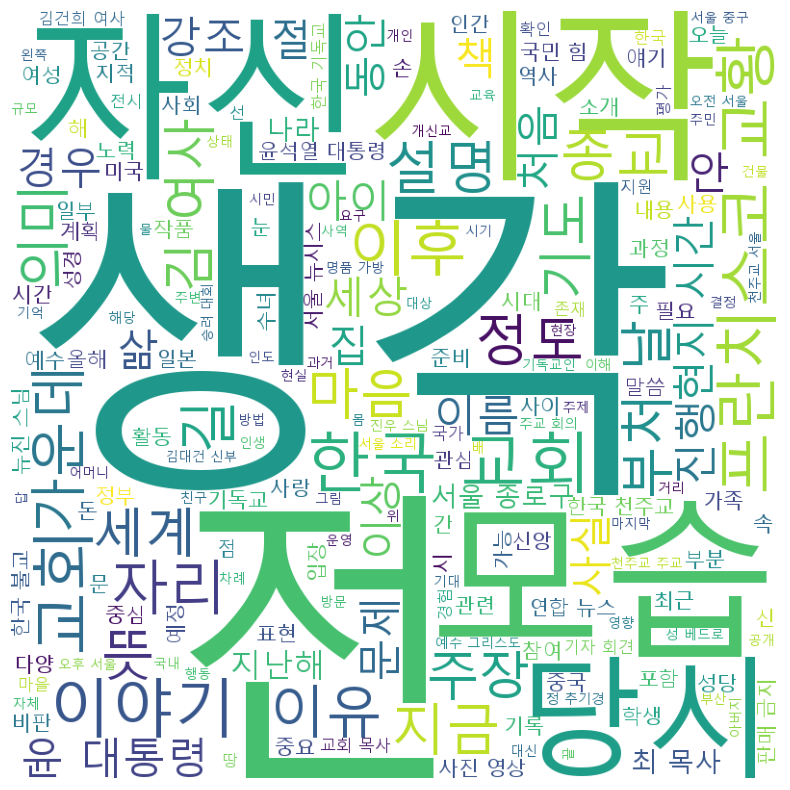

In [65]:
font_path = 'C:\\Users\\user\\anaconda3\\envs\\kiwi\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'
cloud = WordCloud(font_path=font_path,
                  background_color = 'white', 
                  width=800, height=800,
                  colormap='viridis'			
                  )
my_cloud1 = cloud.generate_from_text(all_content)

arr1 = my_cloud1.to_array()

fig = plt.figure(figsize=(10, 10))
plt.imshow(arr1)
plt.axis('off')
plt.show()
fig.savefig(f'{query}wordcloud_.png') #생성한 그림 저장하기